# Dataset Description
- This is a dataset of consumer complaints to the U.S Consumer Financial Protection Bureau. This contains a list of complaints made to the Financial Protection Bureau.

# Problem Statement
- Using this dataset create a text classification model that can predict the "Product" column using the "Consumer complaint narrative" data as input.The model should take a line of text as input and predict the "Product" the complaint is about.


# IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np #library used for numerical computing.
import pandas as pd #library used for data manipulation and analysis.
from plotly.offline import iplot #Part of Ploty library, used for interactive and exploratory data visualization
import matplotlib.pyplot as plt #widely used plotting histograms, barplot etc.
import seaborn as sns #It is a data visualization library built on top of matplotlib, provides a high-level interface for creating attractive and informative statistical graphics.
from tensorflow import keras #used to import keras module form tensorflow package.
from tensorflow.keras.preprocessing.text import Tokenizer #This is a class from the Keras API of TensorFlow used for text preprocessing. It helps tokenize text data into sequences of integers.
from tensorflow.keras.preprocessing.sequence import pad_sequences #This function from Keras is used to pad sequences to a fixed length. It is commonly used to make all sequences of the same length in a dataset.
from tensorflow.keras.models import Sequential #It is a linear stack of layers in Keras, used for building deep learning models.
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D #These are various types of layers used in constructing neural networks in Keras, such as Dense (fully connected), Embedding, LSTM, etc.
from sklearn.model_selection import train_test_split # This function from scikit-learn is used to split the dataset into training and testing sets.
from keras.utils.np_utils import to_categorical #This function from Keras is used to one-hot encode categorical labels (target variables)
from tensorflow.keras.callbacks import EarlyStopping #This is a callback in Keras that stops training the model when a monitored metric has stopped improving.
from tensorflow.keras.layers import Dropout #the Dropout layer is a regularization technique used to prevent overfitting in neural networks.
import re #built-in module in Python that stands for "regular expression." It provides support for regular expressions, which are powerful and flexible patterns used to match and manipulate strings.
import nltk #It is the Natural Language Toolkit library, which provides tools for working with human language data, including text processing, tokenization, and stopword removal.
nltk.download('stopwords') #downloading stopwards from nltk.
from nltk.corpus import stopwords #This is a collection of stopwords in different languages provided by the NLTK library. Stopwords are common words (e.g.,"the," "and," "is") that are usually removed from text data as they don't carry much meaning.
from nltk import word_tokenize # is a function from the Natural Language Toolkit (NLTK) library in Python. It is used to split a sentence or a piece of text into individual words, which is known as tokenization.
STOPWORDS = set(stopwords.words('english')) #is a line of code that creates a set containing common stopwords in the English language using the NLTK library.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# NLTK (Natural Language Toolkit)
- NLTK (Natural Language Toolkit) is the go-to API for NLP (Natural Language Processing) with Python. It is a really powerful tool to preprocess text **data1** for further analysis like with ML models for instance. It helps convert text into numbers, which the model can then easily work with.
- NLTK is a Python library that provides a rich set of modules and resources for NLP, such as tokenizers, parsers, stemmers, taggers, corpora, and models.

# MOUNT GOOGLE DRIVE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOADING THE DATA

In [3]:
data = pd.read_csv('/content/complaints-2021-09-08_07_12.csv')

In [4]:
data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08/27/21,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,None,Bonneville Billing and Collections,FL,33256,None,None,Web,08/27/21,Closed with explanation,Yes,NaN,4669189
1,08/08/21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,None,BOEING EMPLOYEES CREDIT UNION,WA,None,None,None,Web,08/08/21,Closed with explanation,Yes,NaN,4612302
2,08/14/21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,None,"Frontline Asset Strategies, LLC",GA,300XX,None,None,Web,08/14/21,Closed with explanation,Yes,NaN,4632146
3,08/27/21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,None,"Credence Resource Management, LLC",OH,43213,None,None,Web,08/27/21,In progress,Yes,NaN,4668465
4,08/25/21,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,Company has responded to the consumer and the ...,"I.C. System, Inc.",FL,32839,None,Consent not provided,Web,08/25/21,Closed with explanation,Yes,NaN,4658212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49821,08/12/21,Credit card or prepaid card,Gift card,Unexpected or other fees,None,NaN,None,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,920XX,None,None,Web,08/12/21,In progress,Yes,NaN,4626212
49822,08/26/21,Debt collection,I do not know,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,None,Consumer Adjustment Company Incorporated,NJ,085XX,None,None,Web,08/26/21,Closed with explanation,Yes,NaN,4665563
49823,08/17/21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,None,OneMain Finance Corporation,PA,19121,None,None,Web,08/17/21,Closed with explanation,Yes,NaN,4637059
49824,08/26/21,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,NaN,None,ERC,MS,39501,None,None,Web,08/26/21,Closed with explanation,Yes,NaN,4666537


# Domain Analysis
- **Date received**:- The date when the complaint was received.
- **Product**:- The main category of the product or service associated with the complaint.
- **Sub-product**:- A more specific sub-category of the product or service.
- **Issue**:- The main issue or problem raised in the complaint.
- **Sub-issue**: A more specific sub-issue related to the main issue.
- **Consumer complaint narrative**: The detailed text description of the consumer's complaint.
- **Company public response**: The public response provided by the company, if any.
- **Company**: The name of the company being complained about.
- **State**: The state where the consumer is located.
- **ZIP code**: The ZIP code of the consumer.
- **Tags**: Any additional tags or labels associated with the complaint.
- **Consumer consent provided?**: Indicates whether the consumer provided consent for sharing the complaint.
- **Submitted via**: The method through which the complaint was submitted (e.g., web, phone, mail).
- **Date sent to company**: The date when the complaint was sent to the company.
- **Company response to consumer**: The response provided by the company to the consumer's complaint.
- **Timely response?**: Indicates whether the company's response was timely.
- **Consumer disputed**?: Indicates whether the consumer disputed the company's response.
- **Complaint ID**: A unique identifier for each complaint.


# Basic Checks

In [5]:
#viewing first five rows
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08/27/21,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,None,Bonneville Billing and Collections,FL,33256,None,None,Web,08/27/21,Closed with explanation,Yes,NaN,4669189
1,08/08/21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,None,BOEING EMPLOYEES CREDIT UNION,WA,None,None,None,Web,08/08/21,Closed with explanation,Yes,NaN,4612302
2,08/14/21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,None,"Frontline Asset Strategies, LLC",GA,300XX,None,None,Web,08/14/21,Closed with explanation,Yes,NaN,4632146
3,08/27/21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,None,"Credence Resource Management, LLC",OH,43213,None,None,Web,08/27/21,In progress,Yes,NaN,4668465
4,08/25/21,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,Company has responded to the consumer and the ...,"I.C. System, Inc.",FL,32839,None,Consent not provided,Web,08/25/21,Closed with explanation,Yes,NaN,4658212


In [6]:
#viewing last five rows
data.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
49821,08/12/21,Credit card or prepaid card,Gift card,Unexpected or other fees,None,NaN,None,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,920XX,None,None,Web,08/12/21,In progress,Yes,NaN,4626212
49822,08/26/21,Debt collection,I do not know,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,None,Consumer Adjustment Company Incorporated,NJ,085XX,None,None,Web,08/26/21,Closed with explanation,Yes,NaN,4665563
49823,08/17/21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,None,OneMain Finance Corporation,PA,19121,None,None,Web,08/17/21,Closed with explanation,Yes,NaN,4637059
49824,08/26/21,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,NaN,None,ERC,MS,39501,None,None,Web,08/26/21,Closed with explanation,Yes,NaN,4666537
49825,08/13/21,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33138,None,Consent not provided,Web,08/13/21,Closed with explanation,Yes,NaN,4628175


In [7]:
#checking data-types
data.dtypes

Date received                    object
Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer complaint narrative     object
Company public response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Date sent to company             object
Company response to consumer     object
Timely response?                 object
Consumer disputed?              float64
Complaint ID                      int64
dtype: object

In [8]:
#checking shape of the data
data.shape

(49826, 18)

In [9]:
#checking size of the data
data.size

896868

In [10]:
#Checking Duplicates
print(data.loc[data.duplicated()].shape)

(0, 18)


- There are no duplicate values present in these data1set

In [11]:
#checking columns
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

# Explanation on problem statement

- For the specific problem of text classification to predict the "Product" column using the "Consumer complaint narrative" data as input, the other attributes in the dataset may not directly contribute to the text classification task. Therefore, they may not be directly used as features for building this particular model.
- After filtering the data, we can use the "Consumer complaint narrative" as the input text data and "Product" as the target variable for text classification. The goal is to build a model that takes the text of the consumer complaint as input and predicts the corresponding product category it belongs to.

- **Creating new Dataframe data1**

In [12]:
data1 = data[['Consumer complaint narrative','Product']] #This code creates a new DataFrame data1 containing only the columns "Consumer complaint narrative" and "Product" from the original DataFrame data.
data1 = data1.dropna() #filter out rows with missing values (NaN) from the columns "Consumer complaint narrative" and "Product."
data1.head(500) #viewing rows

,Consumer complaint narrative,Product
41,Experian has allowed 6 inquiries on my credit ...,"Credit reporting, credit repair services, or o..."
44,I submitted documentation from XXXX that I sub...,"Credit reporting, credit repair services, or o..."
121,I contacted XXXX XXXX to inquire as to why a t...,"Credit reporting, credit repair services, or o..."
122,IC Systems Re : Dispute of Account No. XXXX XX...,Debt collection
153,This is the 3 time I have disputed and filed a...,"Credit reporting, credit repair services, or o..."
...,...,...
4867,I find it disheartening that you keep claiming...,"Credit reporting, credit repair services, or o..."
4875,I called the customer service phone number and...,Credit card or prepaid card
4881,I was on XXXX XXXX orders while this company c...,"Credit reporting, credit repair services, or o..."
4892,I have sent multiple disputes to remove incorr...,"Credit reporting, credit repair services, or o..."


# Data preprocessing

In [13]:
#checking shape of the data1
data1.shape

(5132, 2)

In [14]:
#checking size of the data1
data1.size

10264

In [15]:
#checking data1-types
data1.dtypes

Consumer complaint narrative    object
Product                         object
dtype: object

In [16]:
data1.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    3151
Debt collection                                                                  790
Credit card or prepaid card                                                      343
Mortgage                                                                         337
Checking or savings account                                                      292
Vehicle loan or lease                                                            107
Money transfer, virtual currency, or money service                                59
Payday loan, title loan, or personal loan                                         42
Student loan                                                                      11
Name: Product, dtype: int64

- **"Product" column of the DataFrame "data1" are being mapped to broader categories to simplify the classification task.**
- **The goal is to group similar product categories together for better model training and prediction.**

In [17]:
data1.Product.loc[(data1['Product'] == "Credit reporting, credit repair services, or other personal consumer reports") |
         (data1['Product'] == "Credit card or prepaid card")] = "Credit Card Related"

data1.Product.loc[(data1['Product'] == "Student loan") | (data1['Product'] == "Vehicle loan or lease") | (data1['Product'] == "Payday loan, title loan, or personal loan")] = "Loan Related"

data1.Product.loc[(data1['Product'] == "Checking or savings account") | (data1['Product'] == "Money transfer, virtual currency, or money service")] = "Bank Related"

data1.Product.loc[(data1['Product'] == "Debt collection") | (data1['Product'] == "Mortgage")] = "Recovery Related"


<ipython-input-17-43c439e55acd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-43c439e55acd>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
#reindexing and dropping the previous index column.
data1.reset_index(inplace = True)
data1.drop('index',axis='columns', inplace=True)


In [19]:
data1.Product.value_counts() #viewing after mapping product column

Credit Card Related    3494
Recovery Related       1127
Bank Related            351
Loan Related            160
Name: Product, dtype: int64

In [20]:
#viewing first five rows
data1.head()

,Consumer complaint narrative,Product
0,Experian has allowed 6 inquiries on my credit ...,Credit Card Related
1,I submitted documentation from XXXX that I sub...,Credit Card Related
2,I contacted XXXX XXXX to inquire as to why a t...,Credit Card Related
3,IC Systems Re : Dispute of Account No. XXXX XX...,Recovery Related
4,This is the 3 time I have disputed and filed a...,Credit Card Related


### Creating a function to check and treat the text data

In [21]:
def example_complain(index): #defining function which takes an index as input and retrieves the corresponding consumer complaint narrative and product category from the data1
    example = data1[data1.index == index][['Consumer complaint narrative', 'Product']].values[0] #filters the data1 to get the row where the index matches the input index. 'values' attribute converts the resulting DataFrame to a NumPy array. Since we are interested in just one row, we access the first row using [0] and store it in the variable example.
    if len(example) > 0: # This line checks if the example variable contains any data. If it does, it means that a matching row was found for the given index.
        print(example[0]) #If a matching row was found, this line prints the consumer complaint narrative (the first element of the example array).
        print()
        print('Category:', example[1]) #These lines create an empty line and then print the product category (the second element of the example array).

In [22]:
#viewing the data of 20th row
example_complain(20)

Information sent in to credit bureau on XX/XX/2021. The bureau has yet to respond or take action in removing the items from my report.

Category: Credit Card Related


# Text-Preprocessing

In [23]:
data1 = data1.reset_index(drop=True) #reset the index and drops the old index.
REPLACE_BY_SPACE_RE = re.compile('[/(){}\|@,;]') #This line creates a regular expression pattern REPLACE_BY_SPACE_RE to match characters like '/', '(', ')', '{', '}', '|', '@', ',', and ';' in the text.
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]') #This line creates another regular expression pattern BAD_SYMBOLS_RE to match any character that is not a digit, lowercase letter, space, '#', '+', or '_'.
STOPWORDS = set(stopwords.words('english')) #This line loads the set of stopwords for the English language. Stopwords are common words (e.g., 'the', 'and', 'is', 'in', etc.) that are usually removed from text as they do not carry much meaning for natural language processing tasks.

def clean_text(text): #This line defines a Python function called clean_text, which takes a string (text) as input.
    """
        text: a string

        return: modified initial string
    """
    text = text.lower() # lowercase text, This line converts the entire text to lowercase. This is done to ensure that the model does not treat words in different cases as different entities.
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = text.replace('x', '') #This line removes the character 'x' from the text.
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) #splits the text into individual words and remove stopwords from text, The words are then joined back together using a space as the separator.
    return text
data1['Consumer complaint narrative'] = data1['Consumer complaint narrative'].apply(clean_text) #applies clean_text function to each element in the 'Consumer complaint narrative' column of the DataFrame data1.

In [24]:
# checking after removing stopwards
example_complain(20)

information sent credit bureau 2021 bureau yet respond take action removing items report

Category: Credit Card Related


- **As we can see unnecessary words have been removed, helping us in getting clean data.**

## Setting up parameters

In [25]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000 #maximum number of words in the vocabulary is set to 10,000.
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
#This variable sets the dimensionality of the word embeddings in the embedding layer of the LSTM mode. This is fixed.
EMBEDDING_DIM = 100 #determines the size of these dense vectors. In this case, the dimensionality of the word embeddings is set to 100, which means each word will be represented by a 100-dimensional vector in the embedding layer.

- These variables play a crucial role in defining the input shape and size of the text data and the word embeddings in the LSTM model. They ensure that the text data is appropriately processed, and the model is trained with a manageable number of words and a fixed sequence length.

## Preprocess the text data and create a word index for the words present in the "Consumer complaint narrative" column of the data1 DataFrame.

In [26]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True) #used to convert text data into sequences of integers, it is used to tokenizing the text, creating a word index, and converting each word in the text into its corresponding integer index.
tokenizer.fit_on_texts(data1['Consumer complaint narrative'].values) #This method is used to fit the Tokenizer on the text data and create the word index. It takes the text data as input and updates the Tokenizer based on the words present in the text.
word_index = tokenizer.word_index # After fitting the Tokenizer, the word_index attribute contains a dictionary where each word is a key, and its corresponding integer index is the value.
print('Found %s unique tokens.' % len(word_index)) #prints the number of unique tokens (words) found in the text data, which corresponds to the size of the word index.

Found 13212 unique tokens.


## Converting preprocessed text data to sequence of integers and then padding the sequence

In [27]:
X = tokenizer.texts_to_sequences(data1['Consumer complaint narrative'].values) #used to convert the preprocessed text data into sequences of integers. It takes the preprocessed text data as input and returns a list of sequences, where each sequence is a list of integers representing the integer indices of the words in the text.
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH) # used to pad the sequences of integers to make them all of the same length. We have our Max_Sequence_Length defined as 250.
print('Shape of data tensor:', X.shape) #This line prints the shape of the data tensor X, which is a 2D numpy array where each row represents a sequence of integers (padded or truncated) and each column represents a word in the sequence.

Shape of data tensor: (5132, 250)


-

In [28]:
#viewing X
X

array([[   0,    0,    0, ...,  187,  238,  294],
       [   0,    0,    0, ...,   13,  602,   26],
       [   0,    0,    0, ...,   89,  465, 2379],
       ...,
       [ 254,  537,   77, ...,  339,  151, 1802],
       [   0,    0,    0, ...,  438,  232,  130],
       [   0,    0,    0, ...,   28,  477,    6]], dtype=int32)

- sequences of integers representing the preprocessed text data.

In [29]:
Y = pd.get_dummies(data1['Product']).values #used to create one-hot encoded vectors for the 'Product' column and converts the one-hot encoded DataFrame into a 2Dnumpy array using '.values' attribute
print('Shape of label tensor:', Y.shape) # prints the shape of the label tensor Y, which is a 2D numpy array.

Shape of label tensor: (5132, 4)


In [30]:
#viewing Y
Y

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

- 2D numpy array representing the one-hot encoded vectors for the target labels (product categories).
- Each row in the array corresponds to a specific sample (complaint narrative), and each column represents a unique product category.

# Splitting the dataset into training and testing.

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4618, 250) (4618, 4)
(514, 250) (514, 4)


# Model Creation

In [32]:
## Architecture of LSTM text classification model using keras sequential API

model = Sequential() #This line creates a Sequential model, which is a linear stack of layers.
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1])) #This adds an Embedding layer to the model. The Embedding layer is used to convert the input sequences (complaint narratives) into dense vectors of fixed size
model.add(SpatialDropout1D(0.2)) # This adds a SpatialDropout1D layer to the model. Spatial dropout is a variation of dropout that drops entire 1D feature maps instead of individual elements. It helps in regularizing the model by preventing overfitting.
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) #This adds an LSTM (Long Short-Term Memory) layer to the model. LSTM is a type of recurrent neural network (RNN) that is well-suited for processing sequences of data. The layer has 100 units, and dropout and recurrent dropout of 0.2 are applied to reduce overfitting.
model.add(Dense(4, activation='softmax')) #This adds a Dense layer with 4 units and a softmax activation function. The softmax activation function is used for multi-class classification problems, and it outputs a probability distribution over the 4 product categories.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #This compiles the model with the categorical cross-entropy loss function, the Adam optimizer, and accuracy as the evaluation metric.
print(model.summary()) #This line prints the summary of the model, showing the architecture and the number of parameters in each layer.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 1,080,804
Trainable params: 1,080,804
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
epochs = 10 #The number of epochs defines how many times the entire training dataset will be used to train the model. In each epoch, the model goes through all the training samples, updates its weights, and tries to minimize the loss function.
batch_size = 64 #The batch size specifies the number of samples that will be processed in one forward and backward pass during each epoch. The training data is divided into batches, and the model's weights are updated after each batch.

In [34]:
#training of the LSTM model on the training data (X_train and Y_train) for the specified number of epochs and batch size. It will use 10% of the training data for validation to monitor the model's performance. The training process will stop early if the validation loss does not improve for three consecutive epochs.
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])



Epoch 1/10
65/65 [==============================] - 78s 1s/step - loss: 0.8840 - accuracy: 0.6747 - val_loss: 0.7469 - val_accuracy: 0.6926
Epoch 2/10
65/65 [==============================] - 70s 1s/step - loss: 0.5856 - accuracy: 0.7695 - val_loss: 0.5974 - val_accuracy: 0.7771
Epoch 3/10
65/65 [==============================] - 60s 932ms/step - loss: 0.3797 - accuracy: 0.8684 - val_loss: 0.5730 - val_accuracy: 0.7965
Epoch 4/10
65/65 [==============================] - 61s 936ms/step - loss: 0.2524 - accuracy: 0.9134 - val_loss: 0.5712 - val_accuracy: 0.8225
Epoch 5/10
65/65 [==============================] - 60s 922ms/step - loss: 0.1815 - accuracy: 0.9408 - val_loss: 0.7420 - val_accuracy: 0.8052
Epoch 6/10
65/65 [==============================] - 59s 912ms/step - loss: 0.1493 - accuracy: 0.9550 - val_loss: 0.6181 - val_accuracy: 0.8203
Epoch 7/10
65/65 [==============================] - 59s 910ms/step - loss: 0.1037 - accuracy: 0.9699 - val_loss: 0.6240 - val_accuracy: 0.8225


# Model Evaluation

In [35]:
accr = model.evaluate(X_test,Y_test) #used to evaluate the trained model on the test data. It takes the test data 'X_test' and the corresponding test labels 'Y_test' as input.
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1])) #prints the evaluation results in a formatted string by inserting the values of accr[0] (loss) and accr[1] (accuracy) into the string at the respective positions.

17/17 [==============================] - 1s 80ms/step - loss: 0.6542 - accuracy: 0.8132
Test set
  Loss: 0.654
  Accuracy: 0.813


- model's loss on the test data is approximately 0.654 or 65% and the accuracy is approximately 0.813 or 81%.

# Visualizing the Performance

-  **It helps in visualizing how the model's performance changes over epochs (training iterations) and if it is overfitting or underfitting.**

## **plot the loss of the training and validation sets during the training process.**

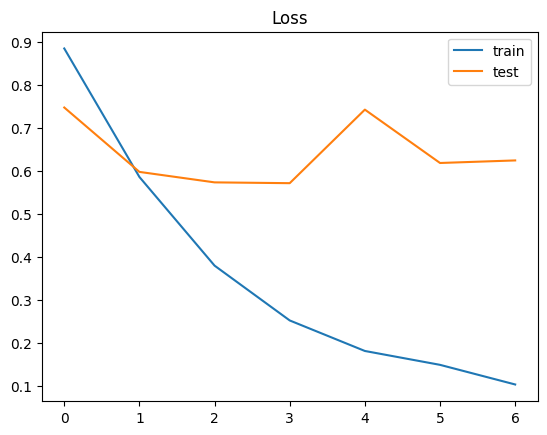

In [36]:
plt.title('Loss') #Sets the title of the plot as "Loss".
plt.plot(history.history['loss'], label='train') #Plots the training loss on the graph.
plt.plot(history.history['val_loss'], label='test') #Plots the validation loss on the graph.
plt.legend() #Displays the legend on the graph, which will show the labels "train" and "test" corresponding to the training and validation loss plots, respectively.
plt.show(); #Displays the plot.

- **The training loss continues to decrease while the validation loss is fluctuating.**

## Visualize the training and validation accuracy of the model over epochs.

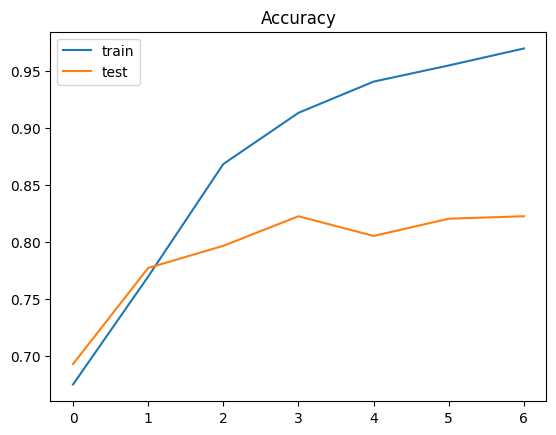

In [37]:
plt.title('Accuracy') #Sets the title of the plot as "Accuracy".
plt.plot(history.history['accuracy'], label='train') #Plots the training accuracy on the graph.
plt.plot(history.history['val_accuracy'], label='test') #Plots the validation accuracy on the graph.
plt.legend() #Displays the legend on the graph, which will show the labels "train" and "test" corresponding to the training and validation accuracy plots, respectively.
plt.show(); #Displays the plot.

- **training accuracy keeps increasing while the validation accuracy keeps fluctuating**

# Predicting the **"product column"** using the **"Consumer complaint narrative"** column.

In [38]:
X_pred = tokenizer.texts_to_sequences(data1['Consumer complaint narrative'].values) #previously fitted on the text data, to convert the text data in the "Consumer complaint narrative" column of the data1 DataFrame into sequences of integers.
X_pred = pad_sequences(X_pred, maxlen=MAX_SEQUENCE_LENGTH) #This line pads the sequences of integers obtained from the previous step to make them all of the same length.

In [39]:
# Make Predictions: Now, use the trained model to make predictions on the preprocessed data.
predictions = model.predict(X_pred)


161/161 [==============================] - 16s 96ms/step


In [40]:
#storing numPy array containing the output probabilities of the model for each input sample.
#np.argmax returns an array containing the index of the maximum value along axis 1.
predicted_classes = np.argmax(predictions, axis=1)


In [41]:
product_mapping = {0: 'Credit Card Related', 1: 'Recovery Related', 2: 'Mortgage Related', 3: 'Credit Reporting Related'} #used to maps integer class labels to their corresponding product names.
predicted_product_names = [product_mapping[label] for label in predicted_classes] #iterates through each predicted class label in predicted_classes, looks up the corresponding product name from the product_mapping dictionary and creates a new list containing the product names.


In [42]:
data1['Predicted Product'] = predicted_product_names #the predicted product names are added as a new column called 'Predicted Product' to the data1 DataFrame.

In [43]:
print(data1[['Consumer complaint narrative', 'Predicted Product']]) #display the original complaints and their corresponding predicted product names side by side.

                           Consumer complaint narrative  \
0     eperian allowed 6 inquiries credit report disp...   
1     submitted documentation submitted included ori...   
2     contacted inquire transaction taking long agen...   
3     ic systems dispute account may concern writing...   
4     3 time disputed filed complaint cfpb ftc overa...   
...                                                 ...   
5127  get alert collection credit report never conta...   
5128  received letter state california chief deputy ...   
5129  attentively review formal writ composed declar...   
5130  tried call eperian several times answer get vo...   
5131  days ago place disputing eperian regards inacc...   

             Predicted Product  
0             Recovery Related  
1             Recovery Related  
2             Recovery Related  
3     Credit Reporting Related  
4             Recovery Related  
...                        ...  
5127          Recovery Related  
5128  Credit Reporting Rela

- **As we can see our model is predicting based on our input data**

In [44]:
model.save('/content/drive/MyDrive/Colab Notebooks')

In [45]:
#Conclusion

# Conclusion
- I have used LSTM model for this multiclass classification Model along with NLTK.
- As per the problem statement the model is successfully predicting the "prooduct" column through "Consumer complaint narrative".


In [ ]:
# Shared embedding layer
embedding_layer = Embedding(input_dim=MAX_NB_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)

# Input layer
input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(input_layer)

# LSTM layer
lstm_layer = LSTM(128)(embedded_sequences)

# Output layers for each category
output_product = Dense(len(label_encoder_product.classes_), activation='softmax', name='output_product')(lstm_layer)
output_sub_product = Dense(len(label_encoder_sub_product.classes_), activation='softmax', name='output_sub_product')(lstm_layer)
output_issue = Dense(len(label_encoder_issue.classes_), activation='softmax', name='output_issue')(lstm_layer)
output_sub_issue = Dense(len(label_encoder_sub_issue.classes_), activation='softmax', name='output_sub_issue')(lstm_layer)

# Model
model = Model(inputs=input_layer, outputs=[output_product, output_sub_product, output_issue, output_sub_issue])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(X_train,
                    [y_product_train, y_sub_product_train, y_issue_train, y_sub_issue_train],
                    validation_data=(X_test, [y_product_test, y_sub_product_test, y_issue_test, y_sub_issue_test]),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stopping, reduce_lr])